In [2]:
import pandas as pd

df=pd.read_csv('housing.csv',index_col=0)
df.tail()

,LSTAT,INDUS,NOX,RM,MEDV
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0
505,7.88,11.93,0.573,6.030,11.9


In [5]:
df2=pd.DataFrame()
df2['LSTAT'] ,df2['MEDV'] =df['LSTAT'] , df['MEDV']
df2.tail()

,LSTAT,MEDV
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0
505,7.88,11.9


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X_train,X_test,y_train,y_test = train_test_split(df2['MEDV'],df2['LSTAT'])
X_train_df , X_test_df = pd.DataFrame(X_train) , pd.DataFrame(X_test)

poly = PolynomialFeatures(degree = 2)
X_train_poly , X_test_poly = poly.fit_transform(X_train_df) , poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly , y_train)
coefficient = model.coef_
intercept = model.intercept_

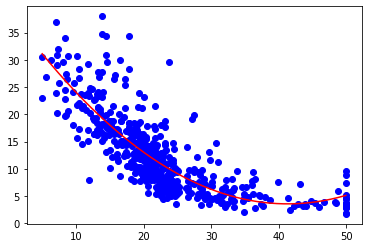

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(5,50,0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2

plt.scatter(df2['MEDV'],df2['LSTAT'],color='b')
plt.plot(x_axis,response,color = 'r')
plt.show()

In [31]:
from sklearn.metrics import r2_score

prediction = model.predict(X_test_poly)

r2_score(prediction,y_test)

0.656390980112457